# ML Zoomcamp - Homework #4
http://mlzoomcamp.com/

# Exploratory Data Analysis

In [1]:
# importando bibliotecas 
import numpy as np # matrizes
import pandas as pd # tratamento do conjunto de dados
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction import DictVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score


In [2]:
# caminho e carregamento do conjunto de dados que será utilizado no trabalho
path = 'https://raw.githubusercontent.com/alexeygrigorev/mlbookcamp-code/master/chapter-02-car-price/data.csv' 
df = pd.read_csv(path)

In [3]:
df.head()

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


#### Features
- Para esse trabalho, só utilizaremos as colunas: Make, Model, Year, Engine HP, Engine Cylinders, Transmission Type, Vehicle Style, highway MPG, city MPG, MSRP

In [4]:
df_work = df[['Make', 'Model', 'Year', 'Engine HP', 'Engine Cylinders', 'Transmission Type', 'Vehicle Style', 'highway MPG', 'city mpg', 'MSRP']]
df_work.head()

,Make,Model,Year,Engine HP,Engine Cylinders,Transmission Type,Vehicle Style,highway MPG,city mpg,MSRP
0,BMW,1 Series M,2011,335.0,6.0,MANUAL,Coupe,26,19,46135
1,BMW,1 Series,2011,300.0,6.0,MANUAL,Convertible,28,19,40650
2,BMW,1 Series,2011,300.0,6.0,MANUAL,Coupe,28,20,36350
3,BMW,1 Series,2011,230.0,6.0,MANUAL,Coupe,28,18,29450
4,BMW,1 Series,2011,230.0,6.0,MANUAL,Convertible,28,18,34500


In [5]:
df_work.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11914 entries, 0 to 11913
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Make               11914 non-null  object 
 1   Model              11914 non-null  object 
 2   Year               11914 non-null  int64  
 3   Engine HP          11845 non-null  float64
 4   Engine Cylinders   11884 non-null  float64
 5   Transmission Type  11914 non-null  object 
 6   Vehicle Style      11914 non-null  object 
 7   highway MPG        11914 non-null  int64  
 8   city mpg           11914 non-null  int64  
 9   MSRP               11914 non-null  int64  
dtypes: float64(2), int64(4), object(4)
memory usage: 930.9+ KB


In [6]:
# uniformizando o estilo das strings
df_work.columns = df_work.columns.str.replace(' ', '_').str.lower()
string_columns = list(df_work.dtypes[df_work.dtypes == 'object'].index)

for col in string_columns:
    df_work[col] = df_work[col].str.lower().str.replace(' ', '_')

C:\Users\felip\AppData\Local\Temp\ipykernel_5256\1078921667.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_work[col] = df_work[col].str.lower().str.replace(' ', '_')


In [7]:
df_work.head()

,make,model,year,engine_hp,engine_cylinders,transmission_type,vehicle_style,highway_mpg,city_mpg,msrp
0,bmw,1_series_m,2011,335.0,6.0,manual,coupe,26,19,46135
1,bmw,1_series,2011,300.0,6.0,manual,convertible,28,19,40650
2,bmw,1_series,2011,300.0,6.0,manual,coupe,28,20,36350
3,bmw,1_series,2011,230.0,6.0,manual,coupe,28,18,29450
4,bmw,1_series,2011,230.0,6.0,manual,convertible,28,18,34500


In [8]:
# Verificando os dados que estão faltando nas colunas selecionadas
df_work.isnull().sum()

make                  0
model                 0
year                  0
engine_hp            69
engine_cylinders     30
transmission_type     0
vehicle_style         0
highway_mpg           0
city_mpg              0
msrp                  0
dtype: int64

In [9]:
df_work = df_work.copy()
df_work.fillna(0, inplace=True) # sbustituindo os dados que estão faltando por 0
df_work.rename(columns={'msrp': 'price'}, inplace=True) # substituindo o nome da coluna msrp
df_work.head(1)

,make,model,year,engine_hp,engine_cylinders,transmission_type,vehicle_style,highway_mpg,city_mpg,price
0,bmw,1_series_m,2011,335.0,6.0,manual,coupe,26,19,46135


In [10]:
price_average = df_work.price.mean()
print(f'A média de preço dos veículos analisados é ${round(price_average, 2)}.')

A média de preço dos veículos analisados é $40594.74.


In [11]:
df_work['above_average'] = df_work['price'].map(lambda x: 1 if x > price_average else 0)
df_work.head()

,make,model,year,engine_hp,engine_cylinders,transmission_type,vehicle_style,highway_mpg,city_mpg,price,above_average
0,bmw,1_series_m,2011,335.0,6.0,manual,coupe,26,19,46135,1
1,bmw,1_series,2011,300.0,6.0,manual,convertible,28,19,40650,1
2,bmw,1_series,2011,300.0,6.0,manual,coupe,28,20,36350,0
3,bmw,1_series,2011,230.0,6.0,manual,coupe,28,18,29450,0
4,bmw,1_series,2011,230.0,6.0,manual,convertible,28,18,34500,0


#### Separação dos dados 

In [12]:
df_train_full, df_test = train_test_split(df_work, test_size=0.2, random_state=1)
df_train, df_val = train_test_split(df_train_full, test_size=0.25, random_state=1)

len(df_train), len(df_val), len(df_test)

(7148, 2383, 2383)

In [13]:
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

In [14]:
y_train = df_train.above_average.values
y_val = df_val.above_average.values
y_test = df_test.above_average.values

## Questão 1

- ROC AUC + Importância de variáveis numéricas;
- Use cada variável numérica como um escore e calcule a AUC para a variável "above_average"
- Usar o conjunto de treino para isso.

Qual variável tem a maior AUC? 

In [15]:
numerical = ['year', 'engine_hp', 'engine_cylinders', 'highway_mpg', 'city_mpg']
categorical = ['make', 'model', 'transmission_type', 'vehicle_style']

In [18]:
X_train = df_train.values.copy()
X_val = df_val.values.copy()

In [17]:
from sklearn.metrics import roc_auc_score

# Initialize an empty dictionary to store AUC values for each feature
auc_scores = {}

# Loop through each feature and calculate its AUC
for feature in numerical:
    # Create a copy of X_train to avoid modifying the original data
    X_train_copy = X_train.copy()
    
    # Calculate ROC AUC by treating the feature as a score
    auc = roc_auc_score(y_train, X_train_copy[feature])
    
    # If AUC is less than 0.5, invert the variable
    if auc < 0.5:
        X_train_copy[feature] = -X_train_copy[feature]
        auc = roc_auc_score(y_train, X_train_copy[feature])
    
    auc_scores[feature] = auc

# Find the feature with the highest AUC
best_feature = max(auc_scores, key=auc_scores.get)

print("AUC Scores for Numerical Variables:")
for feature, auc in auc_scores.items():
    print(f"{feature}: {auc}")

print(f"The numerical variable with the highest AUC is: {best_feature} ({auc_scores[best_feature]})")

AUC Scores for Numerical Variables:
year: 0.687551492804683
engine_hp: 0.9171031265539011
engine_cylinders: 0.766116490165669
highway_mpg: 0.6330587871772013
city_mpg: 0.6734244643245233
The numerical variable with the highest AUC is: engine_hp (0.9171031265539011)


## Questão 2

- Aplicar One-Hot Encoding com DictVectorizer e treinar o modelo de regressão logística;
- Qual a AUC desse modelo no conjunto de validação?

In [21]:
dv = DictVectorizer(sparse=False)
train_dict = df_train[numerical + categorical].to_dict(orient='records')

X_train = dv.fit_transform(train_dict)

val_dict = df_val[numerical + categorical].to_dict(orient='records')
X_val = dv.transform(val_dict)

In [22]:
model = LogisticRegression(solver='liblinear', C=1.0, max_iter=1000)
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000, solver='liblinear')

In [23]:
y_pred = model.predict(X_val)

In [24]:
roc_auc = round(roc_auc_score(y_val, y_pred),3)
roc_auc

0.913

## Questão 3 

- Calcular "precision" e "recall" do modelo;
- Avaliar o modelo com vários limiares: de 0.0 até 1, com passo de 0.01;
- Para cada passo calcular os valores de precision e recall;
- Plotar os valores;
- Qual o valor em que as curvas se interceptam?

In [25]:
y_pred = model.predict_proba(X_val)[:,-1]

In [26]:
thresholds = np.linspace(0.0, 1.0, 101) # return evenly spaced numbers over a specified interval with step 0.01 

# for each threshold, calculate precision and recall
scores = []
for t in thresholds:
    actual_positive = (y_val == 1)
    actual_negative = (y_val == 0)

    predict_positive = (y_pred >= t)
    predict_negative = (y_pred < t)

    tp = (actual_positive & predict_positive).sum()
    fp = (actual_negative & predict_positive).sum()
    fn = (actual_positive & predict_negative).sum()
    tn = (actual_negative & predict_negative).sum()
    
    precision = tp / (tp + fp)
    recall = tp / (tp + fn)

    scores.append((t, tp, fp, fn, tn, precision, recall))
    
columns = ['threshold', 'tp', 'fp', 'fn', 'tn', 'precision', 'recall']
df_scores = pd.DataFrame(scores, columns=columns)

C:\Users\felip\AppData\Local\Temp\ipykernel_5256\1737399830.py:19: RuntimeWarning: invalid value encountered in long_scalars
  precision = tp / (tp + fp)


In [27]:
df_scores.fillna(1, inplace=True)
df_scores[::10]

,threshold,tp,fp,fn,tn,precision,recall
0,0.0,654,1729,0,0,0.274444,1.000000
10,0.1,644,358,10,1371,0.642715,0.984709
20,0.2,625,226,29,1503,0.734430,0.955657
30,0.3,603,156,51,1573,0.794466,0.922018
40,0.4,585,112,69,1617,0.839311,0.894495
50,0.5,568,72,86,1657,0.887500,0.868502
60,0.6,518,52,136,1677,0.908772,0.792049
70,0.7,489,29,165,1700,0.944015,0.747706
80,0.8,427,14,227,1715,0.968254,0.652905
90,0.9,349,4,305,1725,0.988669,0.533639


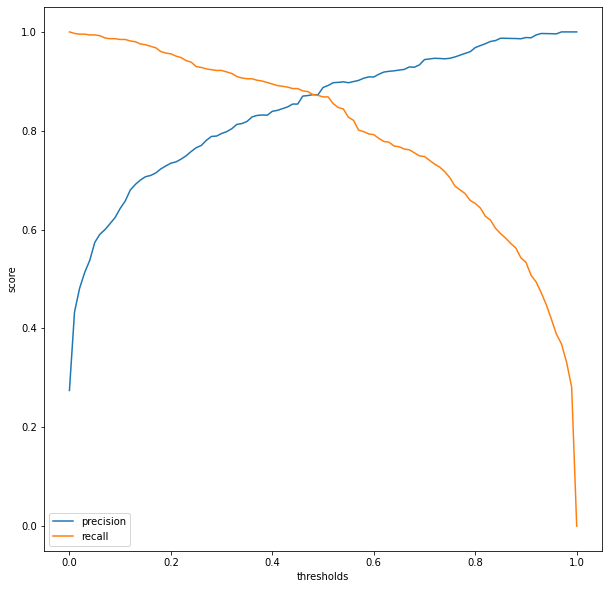

In [29]:
import matplotlib.pyplot as plt 

plt.figure(figsize=(10, 10))

plt.plot(thresholds, df_scores['precision'], label='precision')
plt.plot(thresholds, df_scores['recall'], label='recall')
plt.xlabel('thresholds')
plt.ylabel('score')
plt.legend()
plt.show()

- Intercepto próximo a 0.48

## Questão 4
#### Utilizando F1

- Precision e Recall são valores inversamente proporcionais, quando um aumenta o outro diminui. Por isso eles são frequentemente combinados em uma nova métrica chamada F1 escore.

$$F_1 = 2 \cdot \cfrac{P \cdot R}{P + R}$$

Onde P = Precision e R = Recall;

- Calcular F1 em diferentes limiares, de 0.0 até 1.0 com passo de 0.01.
- Qual o maior F1?

In [30]:
from sklearn.metrics import f1_score

y_pred = model.predict_proba(X_val)[:,-1]

f1_scores = []

for t in thresholds:
    y_pred = (y_pred > t)
    f1 = f1_score(y_val, y_pred)
    f1_scores.append(f1)

max_f1 = max(f1_scores)
optimal_threshold = thresholds[f1_scores.index(max_f1)]

print(f"Valor máximo de F1: {round(max_f1,2)}")
print(f"Threshold correspondente ao valor máximo de F1: {optimal_threshold}")

Valor máximo de F1: 0.43
Threshold correspondente ao valor máximo de F1: 0.0


## Questão 5

- Utilizar validação cruzada para iterar sobre df_full_train;
- Separar os dados em treino e validação;
- Avaliar com AUC;
- Qual é o desvio padrão dos escores em diferentes "folds"?

In [31]:
def train(df_train, y_train):
    dicts = df_train[categorical + numerical].to_dict(orient='records')

    dv = DictVectorizer(sparse=False)
    X_train = dv.fit_transform(dicts)

    model = LogisticRegression(solver='liblinear', C=1.0, max_iter=1000)
    model.fit(X_train, y_train)

    return dv, model

def predict(df, dv, model):
    dicts = df[categorical + numerical].to_dict(orient='records') 
    X = dv.transform(dicts)
    y_pred = model.predict_proba(X)[:, 1]

    return y_pred

In [63]:
from sklearn.model_selection import KFold

# Define the number of splits and create a KFold object
n_splits = 5
kf = KFold(n_splits=n_splits, shuffle=True, random_state=1)

# Initialize a list to store AUC scores for each fold
auc_scores = []

# Define your model
model = LogisticRegression(solver='liblinear', C=1.0, max_iter=1000)


# Iterate over different folds
for train_index, val_index in kf.split(df_train_full):
    df_train = df_train_full.iloc[train_index]
    df_val = df_train_full.iloc[val_index] 

    y_train = df_train.above_average.values
    y_val = df_val.above_average.values

    dv, model = train(df_train, y_train)
    y_pred = predict(df_val, dv, model)

    auc = roc_auc_score(y_val, y_pred)
    auc_scores.append(auc)

# Calculate the mean and standard deviation of the AUC scores across folds
mean_auc = np.mean(auc_scores)
std_auc = np.std(auc_scores)

print(f"Mean AUC across {n_splits} folds: {mean_auc:.4f}")
print(f"Standard Deviation of AUC across {n_splits} folds: {round(std_auc, 3)}")

Mean AUC across 5 folds: 0.9797
Standard Deviation of AUC across 5 folds: 0.003


## Questão 6

- Ajustar os hiperparâmetros do modelo com validação cruzada;
- Iterar sobre valores de c [0.01, 0.1, 0.5, 10]
- Iniciar a validação cruzada como anteriormente;


In [67]:
# Define the number of splits and create a KFold object
n_splits = 5
kf = KFold(n_splits=n_splits, shuffle=True, random_state=1)

# Define a list of C values to iterate over
C_values = [0.01, 0.1, 0.5, 10]

# Initialize a dictionary to store mean AUC scores for each C value
mean_auc_scores = {}

# Iterate over different C values
for C in C_values:
    # Initialize a list to store AUC scores for each fold
    auc_scores = []

    # Define your model with the current C value
    model = LogisticRegression(solver='liblinear', C=C, max_iter=1000)

    # Iterate over different folds
    for train_index, val_index in kf.split(df_train_full):
        df_train = df_train_full.iloc[train_index]
        df_val = df_train_full.iloc[val_index] 

        y_train = df_train.above_average.values
        y_val = df_val.above_average.values

        dv, model = train(df_train, y_train)
        y_pred = predict(df_val, dv, model)

        auc = roc_auc_score(y_val, y_pred)
        auc_scores.append(auc)

    # Calculate the mean and standard deviation AUC score for the current C value
    mean_auc = np.mean(auc_scores)
  
    # Store the mean AUC score in the dictionary
    mean_auc_scores[C] = round(mean_auc, 3)
   
# Find the C value that leads to the best mean AUC score
best_C = max(mean_auc_scores, key=mean_auc_scores.get)

print("Mean AUC Scores:")
for C, mean_auc in mean_auc_scores.items():
    std_auc = np.std(auc_scores)
    print(f"C={C}: Mean AUC = {mean_auc:.3f}, Std AUC = {std_auc:.3f}")

print(f"The best C value is: {best_C} with a mean AUC score of {mean_auc_scores[best_C]}")


Mean AUC Scores:
C=0.01: Mean AUC = 0.980, Std AUC = 0.003
C=0.1: Mean AUC = 0.980, Std AUC = 0.003
C=0.5: Mean AUC = 0.980, Std AUC = 0.003
C=10: Mean AUC = 0.980, Std AUC = 0.003
The best C value is: 0.01 with a mean AUC score of 0.98
